# Big Data Real-Time Analytics with Python and Spark

## Chapter 4 -  Exercises

Time for some practice. Solve the following questions and consult the Python documentation if necessary! 

The solution will be presented in the next chapter.

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [3]:
%reload_ext watermark
%watermark -a "Bianca Amorim" --iversions

Author: Bianca Amorim

seaborn   : 0.11.2
pandas    : 1.4.2
matplotlib: 3.4.3
numpy     : 1.22.3



In [4]:
# The dataset contains records of taxi runs
df = pd.read_csv('datasets/dataframe.csv', parse_dates = ['Data'], usecols = list(range(0,6)))

In [5]:
df.dtypes

Data          datetime64[ns]
Distancia            float64
Tempo                 object
Segundos             float64
Minutos              float64
Min_Por_Km           float64
dtype: object

In [6]:
df.sort_index(inplace = True)
df.sample(10)

,Data,Distancia,Tempo,Segundos,Minutos,Min_Por_Km
63,2015-11-23,3.05,0:22:35,1355.0,22.583333,7.404372
19,2015-08-20,1.37,0:09:33,573.0,9.550000,6.970803
32,2015-09-08,3.05,0:23:11,1391.0,23.183333,7.601093
31,2015-09-05,3.05,0:23:50,1430.0,23.833333,7.814208
4,2015-08-07,2.30,NaN,NaN,NaN,NaN
66,2015-12-09,2.93,0:25:00,1500.0,25.000000,8.532423
2,2015-08-04,2.10,NaN,NaN,NaN,NaN
12,2015-08-14,0.90,0:06:16,376.0,6.266667,6.962963
59,2015-11-09,3.05,0:22:36,1356.0,22.600000,7.409836
22,2015-08-23,1.34,NaN,NaN,NaN,NaN


#### Exercise 1 - What is the maximum value of the Minutes column?

In [7]:
max_minutes = df['Minutos'].max()
max_minutes

260.71666666666664

#### Exercise 2 - What is the minimum distance value above 2.0?

In [8]:
min_distance = df[df['Distancia'] > 2.0]['Distancia'].min()
min_distance

2.01

#### Exercise 3 - Create a plot with the cumulative frequency of the Distance column.

<AxesSubplot:xlabel='Distancia', ylabel='Count'>

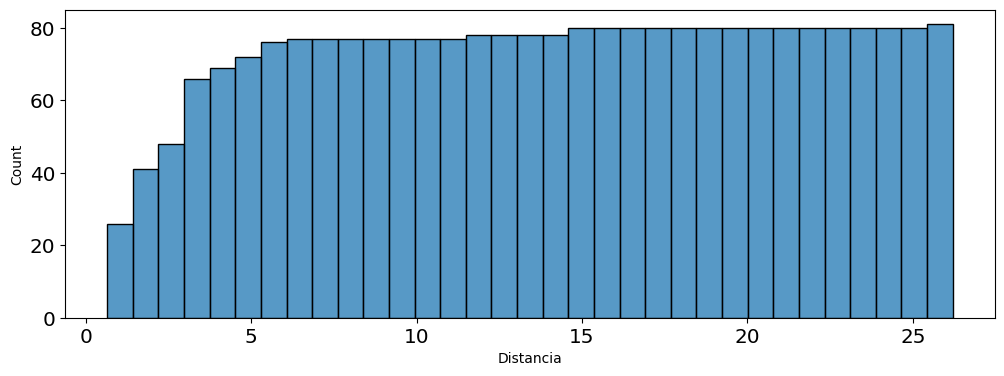

In [9]:
dist_cumulative_freq = sns.histplot(df['Distancia'], cumulative = True)
dist_cumulative_freq

####  Exercise 4 - What is the day of the week at position index zero?

In [10]:
df.head()

,Data,Distancia,Tempo,Segundos,Minutos,Min_Por_Km
0,2015-08-02,1.70,NaN,NaN,NaN,NaN
1,2015-08-03,1.40,NaN,NaN,NaN,NaN
2,2015-08-04,2.10,NaN,NaN,NaN,NaN
3,2015-08-06,2.38,NaN,NaN,NaN,NaN
4,2015-08-07,2.30,NaN,NaN,NaN,NaN


In [11]:
df['Data'][0]

Timestamp('2015-08-02 00:00:00')

In [12]:
type(df['Data'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [13]:
weekday0 = pd.Timestamp(df['Data'][0]).day_name()
weekday0

'Sunday'

#### Exercise 5 - What day of the week in the indexes in the top 5 positions?

In [14]:
i = 0
for i in range(0,5):
    print(i, pd.Timestamp(df['Data'][i]).day_name())

0 Sunday
1 Monday
2 Tuesday
3 Thursday
4 Friday


#### Exercise 6 - Extract all the days of the week (in text format) and insert them in a new column in the dataframe df.

In [15]:
day_of_week = df.apply(lambda row: pd.Timestamp(row['Data']).day_name(), axis = 1)
day_of_week

0        Sunday
1        Monday
2       Tuesday
3      Thursday
4        Friday
        ...    
76     Thursday
77       Friday
78     Saturday
79    Wednesday
80       Friday
Length: 81, dtype: object

In [16]:
# df.insert(0, column = "ID",  value = range(1, 1 + len(df)))
# df.insert(1, column = 'Dia da semana', value = lambda row: pd.Timestamp(row['Data']).day_name())
df.insert(1, column = 'Dia da semana', value = day_of_week)
df.head(7)

,Data,Dia da semana,Distancia,Tempo,Segundos,Minutos,Min_Por_Km
0,2015-08-02,Sunday,1.70,NaN,NaN,NaN,NaN
1,2015-08-03,Monday,1.40,NaN,NaN,NaN,NaN
2,2015-08-04,Tuesday,2.10,NaN,NaN,NaN,NaN
3,2015-08-06,Thursday,2.38,NaN,NaN,NaN,NaN
4,2015-08-07,Friday,2.30,NaN,NaN,NaN,NaN
5,2015-08-08,Saturday,3.40,NaN,NaN,NaN,NaN
6,2015-08-09,Sunday,2.50,NaN,NaN,NaN,NaN


#### Exercise 7 - Create a bar graph with the total distance traveled on each day of the week.

In [17]:
total_distance_week = df.groupby(['Dia da semana']).agg({'Distancia': 'sum'}).reset_index()
total_distance_week.columns = ["Dia da semana", "Distancia Total"]
total_distance_week

,Dia da semana,Distancia Total
0,Friday,50.52
1,Monday,26.65
2,Saturday,41.79
3,Sunday,45.45
4,Thursday,26.52
5,Tuesday,36.50
6,Wednesday,26.71


In [18]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_distance_week['Dia da semana'] = pd.Categorical(total_distance_week['Dia da semana'],
                                                      categories = cats,
                                                      ordered = True)
total_distance_week = total_distance_week.sort_values('Dia da semana')
total_distance_week

,Dia da semana,Distancia Total
1,Monday,26.65
5,Tuesday,36.50
6,Wednesday,26.71
4,Thursday,26.52
0,Friday,50.52
2,Saturday,41.79
3,Sunday,45.45


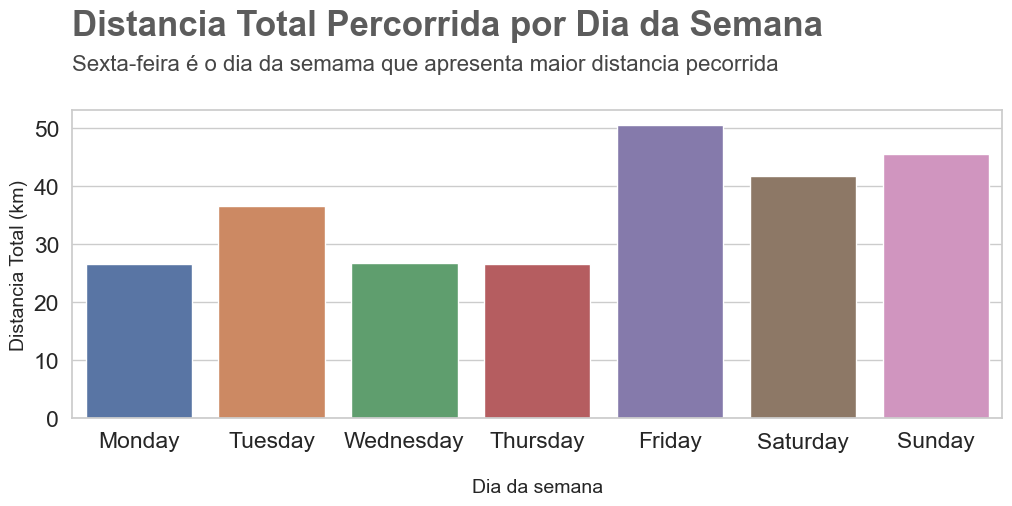

In [27]:
# Graph total distance traveled on each day of the week.

# Picture size
plt.figure(figsize = (12, 4))

# Chart
chart = sns.barplot(x = 'Dia da semana',
                    y = 'Distancia Total',
                    data = total_distance_week)

# Style and labels
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
chart.set_xlabel("\nDia da semana", fontsize = 14)
chart.set_ylabel("Distancia Total (km)", fontsize = 14)


# Add title
chart.text(x = -0.5,
          y = 66,
          s = "Distancia Total Percorrida por Dia da Semana",
          fontsize = 25,
          weight = 'bold',
          alpha = .75)

# Add Subtitle
chart.text(x = -0.5,
          y = 60,
          s = 'Sexta-feira é o dia da semama que apresenta maior distancia pecorrida',
          fontsize = 16,
          alpha = .85);

## Sort and display in proper weekday order

#### Exercise 8 - Delete the Time column from the dataframe df.

In [20]:
df.drop(columns = ['Tempo'], inplace = True)
df.head()

,Data,Dia da semana,Distancia,Segundos,Minutos,Min_Por_Km
0,2015-08-02,Sunday,1.70,NaN,NaN,NaN
1,2015-08-03,Monday,1.40,NaN,NaN,NaN
2,2015-08-04,Tuesday,2.10,NaN,NaN,NaN
3,2015-08-06,Thursday,2.38,NaN,NaN,NaN
4,2015-08-07,Friday,2.30,NaN,NaN,NaN


#### Exercise 9 - What is the total number of taxi rides per day of the week?

In [21]:
df.insert(0, column = "ID",  value = range(1, 1 + len(df)))

In [22]:
df.head()

,ID,Data,Dia da semana,Distancia,Segundos,Minutos,Min_Por_Km
0,1,2015-08-02,Sunday,1.70,NaN,NaN,NaN
1,2,2015-08-03,Monday,1.40,NaN,NaN,NaN
2,3,2015-08-04,Tuesday,2.10,NaN,NaN,NaN
3,4,2015-08-06,Thursday,2.38,NaN,NaN,NaN
4,5,2015-08-07,Friday,2.30,NaN,NaN,NaN


In [23]:
# Take care because maybe we have nan values
total_taxi_ride = df.groupby(['Dia da semana']).agg({'ID': 'nunique'}).reset_index()
total_taxi_ride.columns = ['Dia da semana', 'Total de corridas de Taxi']
total_taxi_ride

,Dia da semana,Total de corridas de Taxi
0,Friday,8
1,Monday,11
2,Saturday,15
3,Sunday,14
4,Thursday,8
5,Tuesday,14
6,Wednesday,11


#### Exercise 10 - What is the average for each of the columns by day of the week?

In [24]:
df.drop(columns = ['ID'], inplace = True)
df.head()

,Data,Dia da semana,Distancia,Segundos,Minutos,Min_Por_Km
0,2015-08-02,Sunday,1.70,NaN,NaN,NaN
1,2015-08-03,Monday,1.40,NaN,NaN,NaN
2,2015-08-04,Tuesday,2.10,NaN,NaN,NaN
3,2015-08-06,Thursday,2.38,NaN,NaN,NaN
4,2015-08-07,Friday,2.30,NaN,NaN,NaN


In [25]:
mean_columns = df.groupby(['Dia da semana']).mean()
mean_columns

,Distancia,Segundos,Minutos,Min_Por_Km
Dia da semana,,,,
Friday,6.315000,5071.800000,84.530000,8.039543
Monday,2.422727,1185.750000,19.762500,7.463840
Saturday,2.786000,1458.500000,24.308333,7.747657
Sunday,3.246429,2802.500000,46.708333,8.184961
Thursday,3.315000,1681.285714,28.021429,7.829348
Tuesday,2.607143,1334.600000,22.243333,7.463291
Wednesday,2.428182,1306.250000,21.770833,7.659706


# The End